### Scraping from opensooq

In [15]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import time

In [17]:
base_url = 'https://om.opensooq.com/en/property/property-for-sale'
headers = {
     'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36 Edg/138.0.0.0'
}    

In [18]:
titles = []
locations = []
prices = []
sizes = []
listing_types = []

page = 1

while True:
    url = f"{base_url}?page={page}"
    print(f"Scraping page {page}: {url}")
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to retrieve page {page}. Status: {response.status_code}")
        break

    soup = BeautifulSoup(response.content, "html.parser")
    cards = soup.find_all('a', class_=lambda x: x and 'postListItemData' in x)

    if not cards:
        print("No more cards found. Stopping.")
        break

    for card in cards:
        text = card.get_text(separator='\n', strip=True)
        lines = text.split('\n')

        # Title (3rd line usually)
        title = lines[2] if len(lines) > 2 else None
        titles.append(title)

        # Location (based on "Chat" position)
        location = None
        for i, line in enumerate(lines):
            if "Chat" in line and i >= 2:
                location = lines[i - 2] + ", " + lines[i - 1]
                break
        locations.append(location)

        # Price (last line)
        price = lines[-1] if lines else None
        prices.append(price)

        # Size (if available in <p> tag)
        size = None
        p_tag = card.find('p')
        if p_tag:
            match = re.search(r'Surface\s*Area:\s*([0-9,]+)\s*m2', p_tag.text)
            if match:
                size = match.group(1).replace(',', '')
        sizes.append(size)

        # Listing type (fixed)
        listing_types.append("For Sale")

    # Check if there's a next page
    next_page = soup.find('a', attrs={'data-id': 'nextPageArrow'})
    if not next_page:
        print("No next page. Done scraping.")
        break

    page += 1
    time.sleep(1)

# Combine data and save to CSV
data = {
    "Title": titles,
    "Location": locations,
    "Price": prices,
    "Size": sizes,
    "Listing_Type": listing_types
}

df = pd.DataFrame(data)
df.to_csv("opensooq_for_sale.csv", index=False) # to save it as csv file 


Scraping page 1: https://om.opensooq.com/en/property/property-for-sale?page=1
Scraping page 2: https://om.opensooq.com/en/property/property-for-sale?page=2
Scraping page 3: https://om.opensooq.com/en/property/property-for-sale?page=3
Scraping page 4: https://om.opensooq.com/en/property/property-for-sale?page=4
Scraping page 5: https://om.opensooq.com/en/property/property-for-sale?page=5
Scraping page 6: https://om.opensooq.com/en/property/property-for-sale?page=6
Scraping page 7: https://om.opensooq.com/en/property/property-for-sale?page=7
Scraping page 8: https://om.opensooq.com/en/property/property-for-sale?page=8
Scraping page 9: https://om.opensooq.com/en/property/property-for-sale?page=9
Scraping page 10: https://om.opensooq.com/en/property/property-for-sale?page=10
Scraping page 11: https://om.opensooq.com/en/property/property-for-sale?page=11
Scraping page 12: https://om.opensooq.com/en/property/property-for-sale?page=12
Scraping page 13: https://om.opensooq.com/en/property/prop

In [125]:
# to print the data as a DataFrame
df = pd.read_csv('opensooq_for_sale.csv')
df

,Title,Location,Price,Size,Listing_Type
0,واخيراً أقوى سوق تجاري في السلطنة تملك محلك ال...,", Seeb, 771110XX","29,406 OMR",30.0,For Sale
1,For sale at Muscat hills 2 bedrooms apartment ...,", Muscat Hills, 982521XX","97,000 OMR",135.0,For Sale
2,32 m2 Studio Apartments for Sale in Muscat Halban,", Halban, 943336XX","7,800 OMR",32.0,For Sale
3,Residential Land for Sale in Muscat Quriyat,", Quriyat, 726131XX","12,000 OMR",NaN,For Sale
4,Residential Land for Sale in Muscat Amerat,", Amerat, 970008XX","46,000 OMR",NaN,For Sale
...,...,...,...,...,...
8284,Residential Land for Sale in Muscat Ruwi,", Ruwi, 799617XX","150,000 OMR",NaN,For Sale
8285,307 m2 5 Bedrooms Villa for Sale in Muscat Al ...,", Al Mawaleh, 919113XX","115,000 OMR",307.0,For Sale
8286,Residential Land for Sale in Al Dakhiliya Bidbid,", Bidbid, 780066XX","4,500 OMR",NaN,For Sale
8287,302 m2 4 Bedrooms Villa for Sale in Muscat Misfah,", Misfah, 964464XX","85,000 OMR",302.0,For Sale


## Exploring Data

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         8289 non-null   object 
 1   Location      8288 non-null   object 
 2   Price         8289 non-null   object 
 3   Size          4037 non-null   float64
 4   Listing_Type  8289 non-null   object 
dtypes: float64(1), object(4)
memory usage: 323.9+ KB


In [101]:
df.describe

<bound method NDFrame.describe of                                                   Title  \
0     واخيراً أقوى سوق تجاري في السلطنة تملك محلك ال...   
1     For sale at Muscat hills 2 bedrooms apartment ...   
2     32 m2 Studio Apartments for Sale in Muscat Halban   
3           Residential Land for Sale in Muscat Quriyat   
4            Residential Land for Sale in Muscat Amerat   
...                                                 ...   
8284           Residential Land for Sale in Muscat Ruwi   
8285  307 m2 5 Bedrooms Villa for Sale in Muscat Al ...   
8286   Residential Land for Sale in Al Dakhiliya Bidbid   
8287  302 m2 4 Bedrooms Villa for Sale in Muscat Misfah   
8288  For Sale: In Development 6-Bedroom Twin Villa ...   

                      Location        Price   Size Listing_Type  
0             , Seeb, 771110XX   29,406 OMR   30.0     For Sale  
1     , Muscat Hills, 982521XX   97,000 OMR  135.0     For Sale  
2           , Halban, 943336XX    7,800 OMR   32.0     For 

In [102]:
df.describe()

,Size
count,4.037000e+03
mean,8.019843e+05
std,3.662096e+07
min,1.000000e+00
25%,7.000000e+01
50%,1.500000e+02
75%,3.350000e+02
max,2.147484e+09


In [118]:
df.describe(include='all')

,Title,Location,Price,Size,Listing_Type
count,8289,8289,8289,8289.0,8289
unique,3542,4895,764,<NA>,1
top,Residential Land for Sale in Al Batinah Barka,", Al Mouj, 939918XX","27,000 OMR",<NA>,For Sale
freq,498,111,147,<NA>,8289
mean,NaN,NaN,NaN,390668.175654,NaN
std,NaN,NaN,NaN,25558407.348274,NaN
min,NaN,NaN,NaN,1.0,NaN
25%,NaN,NaN,NaN,150.0,NaN
50%,NaN,NaN,NaN,150.0,NaN
75%,NaN,NaN,NaN,150.0,NaN


In [119]:
df.dtypes

Title           object
Location        object
Price           object
Size             Int64
Listing_Type    object
dtype: object

In [120]:
df.shape

(8289, 5)

In [121]:
df.columns

Index(['Title', 'Location', 'Price', 'Size', 'Listing_Type'], dtype='object')

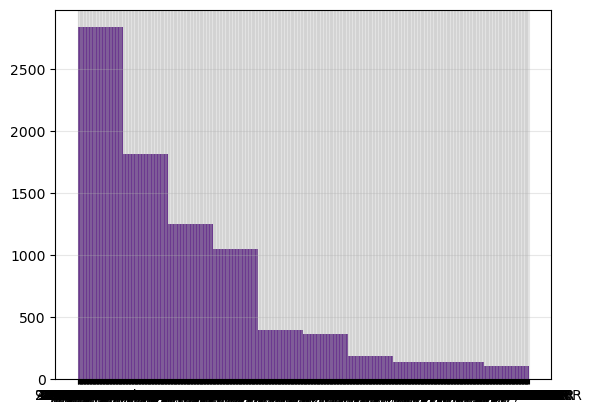

In [122]:
df['Price'].hist(color = 'indigo')
plt.grid(alpha=0.3)
plt.show()

### Cleaning Data

In [126]:
df.isnull()

,Title,Location,Price,Size,Listing_Type
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
8284,False,False,False,True,False
8285,False,False,False,False,False
8286,False,False,False,True,False
8287,False,False,False,False,False


In [127]:
df.isnull().sum()

Title              0
Location           1
Price              0
Size            4252
Listing_Type       0
dtype: int64

In [128]:
# Fill numeric columns with mean or median
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Size'] = df['Size'].fillna(df['Size'].median())

In [129]:
df.isnull().sum()

Title           0
Location        0
Price           0
Size            0
Listing_Type    0
dtype: int64

In [130]:
df.dtypes

Title            object
Location         object
Price            object
Size            float64
Listing_Type     object
dtype: object

In [131]:
# Extract numeric part (if it's a string with text)
df['Size'] = df['Size'].astype(str).str.extract(r'(\d+\.?\d*)')

# Convert to float first (to handle decimals safely)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

#Convert to integer
df['Size'] = df['Size'].astype('Int64')

In [132]:
df.dtypes

Title           object
Location        object
Price           object
Size             Int64
Listing_Type    object
dtype: object

In [133]:
df['Price'] = df['Price'].astype(str).str.extract(r'(\d+\.?\d*)')

# Convert to float first (to handle decimals safely)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#Convert to integer
df['Price'] = df['Price'].astype('Int64')

In [134]:
df.dtypes

Title           object
Location        object
Price            Int64
Size             Int64
Listing_Type    object
dtype: object

In [136]:
# Strip whitespace and lowercase text in relevant columns
df['Title'] = df['Title'].str.strip()
df['Location'] = df['Location'].str.strip()
df['Listing_Type'] = df['Listing_Type'].str.strip().str.lower()

In [137]:
df.head()

,Title,Location,Price,Size,Listing_Type
0,واخيراً أقوى سوق تجاري في السلطنة تملك محلك ال...,", Seeb, 771110XX",29,30,for sale
1,For sale at Muscat hills 2 bedrooms apartment ...,", Muscat Hills, 982521XX",97,135,for sale
2,32 m2 Studio Apartments for Sale in Muscat Halban,", Halban, 943336XX",7,32,for sale
3,Residential Land for Sale in Muscat Quriyat,", Quriyat, 726131XX",12,150,for sale
4,Residential Land for Sale in Muscat Amerat,", Amerat, 970008XX",46,150,for sale


In [138]:
# Drop duplicates 
df.drop_duplicates()

,Title,Location,Price,Size,Listing_Type
0,واخيراً أقوى سوق تجاري في السلطنة تملك محلك ال...,", Seeb, 771110XX",29,30,for sale
1,For sale at Muscat hills 2 bedrooms apartment ...,", Muscat Hills, 982521XX",97,135,for sale
2,32 m2 Studio Apartments for Sale in Muscat Halban,", Halban, 943336XX",7,32,for sale
3,Residential Land for Sale in Muscat Quriyat,", Quriyat, 726131XX",12,150,for sale
4,Residential Land for Sale in Muscat Amerat,", Amerat, 970008XX",46,150,for sale
...,...,...,...,...,...
8275,114 m2 2 Bedrooms Apartments for Sale in Musca...,", Madinat As Sultan Qaboos, 969317XX",62,114,for sale
8276,42 m2 Studio Apartments for Sale in Dhofar Mirbat,", Mirbat, 995847XX",17,42,for sale
8277,Residential Land for Sale in Dhofar Salala,", Salala, 995847XX",10,150,for sale
8278,280 m2 4 Bedrooms Townhouse for Sale in Al Bat...,", Barka, 954424XX",55,280,for sale


In [139]:
df.isnull().sum()

Title           0
Location        0
Price           5
Size            0
Listing_Type    0
dtype: int64

In [140]:
df['Price'] = df['Price'].fillna(df['Price'].median())

In [141]:
df.isnull().sum()

Title           0
Location        0
Price           0
Size            0
Listing_Type    0
dtype: int64

In [142]:
# savec leaned DataFrame as csv file
df_opensooq_clean.to_csv("cleaned_opensooq.csv", index=False)